> Yaromir Kapustin

> ver 0.1

> 10.10.2022

## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность


> Датасет представляет собой таблицу excel с данными по недвижимости

---

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel(r"C:\Users\user\Desktop\RE_dataset.xlsx")
to_drop = ['No'] #выкидываю столбец нумерации и даты транзакции из файла
df.drop(to_drop, inplace=True, axis=1)
# никаких пропусков в значениях, равно как и нерелевантных значений мной не было обнаружено

array([[<AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>,
        <AxesSubplot:title={'center':'X6 longitude'}>],
       [<AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

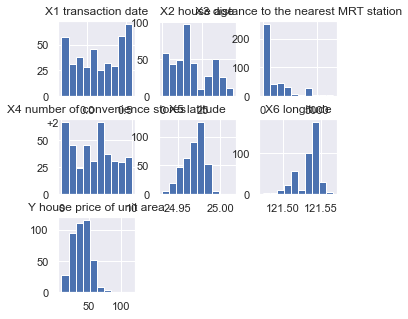

In [18]:
df.hist() #гистограммы по столбцам. Строю до нормализации, поскольку изначально данные более информативные

#### Выводы по гистограммам:
- Большинство транзакций было проведено в 2012.7, 2013.5, 2013.6 (август 2012, июнь и июль 2013)
- Большинство домов младше 20 лет
- Превалирующее расстояние до метро до 1000м
- Количество магазинов либо 0, либо 6. Распределение довольно равномерно
- Большинство объектов располагается в координатах [24,975; 121,540] (район Синьдянь города Тайбэй)
- Наиболее распостраненный диапазон цен: от 20 до 60 ед.
- Визуально ни одна из гистограм не имеет форму колокола, т.е. не является нормально распределенной.

In [19]:
df = df.corr() #Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1

---
##### Строю тепловую матрицу корреляции с использованием разных методов

<AxesSubplot:>

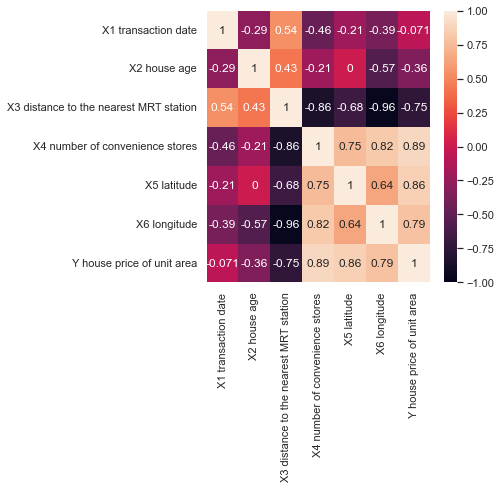

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

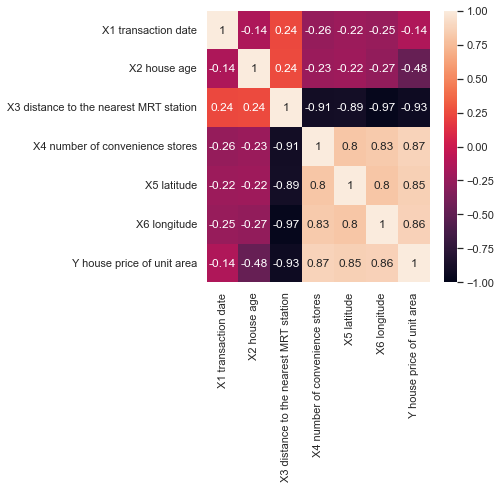

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(method ='pearson'), annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

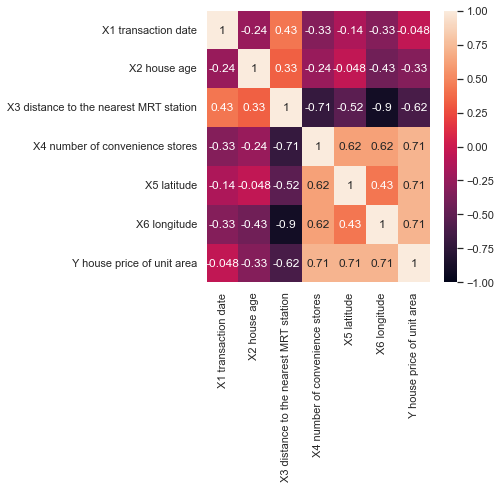

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(method='kendall'), annot=True, vmin=-1, vmax=1)

##### Выводы по матрице корелляции
* Выбор модели для постройки матрицы корреляции влияет на коэфициенты, однако значения близки для каждой из моделей.
* Ключевой параметр для сравнения будет "цена за единицу площади". 
* Практически не зависит от даты совершения сделки.
* Широта и долгота сильно влияет на цену. (т.е. расположение)
* Кол-во магазинов рядом также влияет на цену в той же мере. (чем больше, тем дороже)
* Обратная корреляция наблюдается при сравнении расстояния до метро. (чем меньше, тем дороже(что логично))
* Возраст дома в меньшей мере влияет на цену (чем младше дом, тем дороже)

In [23]:
#тест на нормальность
from scipy.stats import shapiro 

shapiro(df)

ShapiroResult(statistic=0.9292319416999817, pvalue=0.00574519531801343)

##### Поскольку p-значение меньше 0.05, это означает, что данные выборки не относятся к нормальному распределению.

---

In [88]:
# нормализую данные
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df #на выходе получаю нормализованные массивы numpy

array([[0.27272729, 0.73059361, 0.00951267, ..., 0.61694135, 0.71932284,
        0.27570519],
       [0.27272729, 0.44520548, 0.04380939, ..., 0.5849491 , 0.71145137,
        0.31483167],
       [1.        , 0.30365297, 0.08331505, ..., 0.67123122, 0.75889584,
        0.36123749],
       ...,
       [0.63636365, 0.42922374, 0.05686115, ..., 0.57149782, 0.71522536,
        0.30027298],
       [0.36363635, 0.18493151, 0.0125958 , ..., 0.42014057, 0.72395946,
        0.40855323],
       [0.90909094, 0.14840183, 0.0103754 , ..., 0.51211827, 0.75016174,
        0.51228389]])